# Classifying Credit Card Fraud with Machine Learning

# Import Libraries

In [7]:
# System
# ----------------
import os, sys # Command-line and system tools
import joblib

# Data Analytics
# -------------------------
import pandas as pd
import numpy as np

# Statistics
# -------------------------
from scipy.stats import uniform

# Data Visualisation
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns # More customisation
sns.set_style('darkgrid') # Set style

# Kaggle Datasets (Kaggle: Subsidiary of Google LLC)
# -------------------------
import kagglehub # Connecting to Kaggle API

# Machine Learning
# -------------------------
from sklearn.model_selection import train_test_split # Train-test splitting
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter-tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score # Cross-validation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report # Metrics
from sklearn.metrics import auc, roc_curve

'''
-------------------------
Addressing Class Imbalance with SMOTE
-------------------------
'''

# SMOTE (Synthetic Minority Over-sampling Technique)
# -------------------------
from imblearn.over_sampling import SMOTE

'''
-------------------------
Machine Learning models of choice:
-------------------------

(1) Logistic Regression.

(2) RandomForest.

(3) XGBoost (Extreme Gradient Boosting).

'''

# Logistic Regression
# -------------------------
from sklearn.linear_model import LogisticRegression

# Random Forest
# -------------------------
from sklearn.ensemble import RandomForestClassifier

# XGBoost
# -------------------------
from xgboost import XGBClassifier

# Gradio Test User Interface
# -------------------------
import gradio as gr
import pandas as pd

C:\Users\clint\anaconda3\envs\py312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import Data

In [9]:
# Download dataset from Kaggle
# -------------------------
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\clint\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [10]:
cd $path

C:\Users\clint\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


C:\Users\clint\anaconda3\envs\py312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
ls

 Volume in drive C is OS
 Volume Serial Number is C88A-CBDB

 Directory of C:\Users\clint\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3

2024/11/05  17:06    <DIR>          .
2024/11/05  15:29    <DIR>          ..
2024/11/05  15:29       150 828 752 creditcard.csv
               1 File(s)    150 828 752 bytes
               2 Dir(s)  338 746 228 736 bytes free


In [12]:
DF = pd.read_csv('creditcard.csv', index_col=False)

# About the Dataset

(1) The dataset contains transactions made by credit cards in September 2013 by European cardholders.

(2)  <span style="color:red"> 284,807 </span> transactions in total.

(3)  <span style="color:red"> 492 fraudulent transactions </span> in the dataset.

(4) The dataset consists of <span style="color:red"> numeric data only </span>, as a result of principal component analysis (PCA) for <span style="color:red"> privacy concerns </span>.

# Data Inspection and Cleaning

In [15]:
# Display the Dataset
# -------------------------
display(DF)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
# Check Datatypes of Dataset
# -------------------------
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
# Check for NaN / Non-Numeric Values
# -------------------------
print(DF.isna())

# Count These
# -------------------------
np.unique(DF.isna(), return_counts=True)

         Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...    V21    V22    V23    V24

(array([False]), array([8829017], dtype=int64))

In [18]:
# Check for null values
# -------------------------
print(DF.isnull())

# Count These
# -------------------------
np.unique(DF.isnull(), return_counts=True)

         Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...    V21    V22    V23    V24

(array([False]), array([8829017], dtype=int64))

## Results from Data Inspection and Cleaning:

- **<span style="color:green"> No non-numeric values were found. </span>** (Dataset is intact).

- **<span style="color:green"> No missing values were found. </span>** (No-need for data interpolation).

- **<span style="color:green"> No need for further cleaning </span>**.

# Feature Analysis:

When analysing the features within our dataset, things we might care about include:

(1) Their statisical **<span style="color:teal"> mean (average) </span>**, and **<span style="color:teal"> standard deviation </span>**.

(2) The distribution of values.

(3) Their **<span style="color:teal"> mean (average) </span>** minimum and maximum </span> values. (Their range).

(4) Possible **<span style="color:teal"> mean (average) </span>** correlations </span> between features.

$$ 
\text{Statistical mean}: \huge \mu = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

$$ 
\text{Standard Deviation}: \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

$$ 
\text{min}(X) = \min(X_1, X_2, \dots, X_n)
$$ 

$$ 
\text{max}(X) = \max(X_1, X_2, \dots, X_n)
$$ 

$$ 
\text{Range}(X) = \text{max}(X) - \text{min}(X)
$$ 

In [23]:
DF_desc = DF.describe().drop(columns=['Time', 'Amount', 'Class'])
DF_desc

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


## Mean

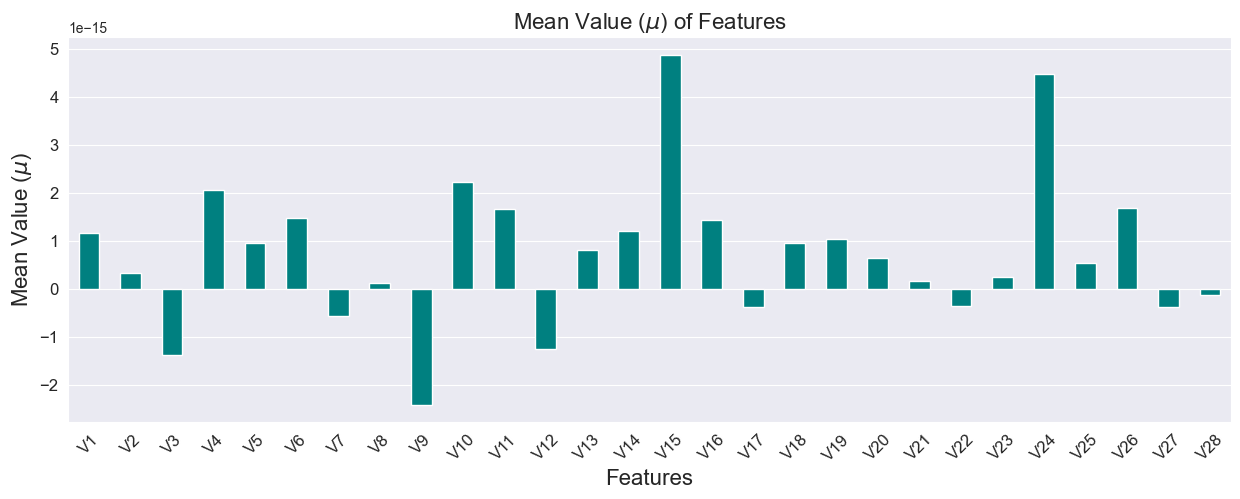

In [25]:
# Create Figure
# -------------------------
DF_desc.loc[['mean']].T.plot(kind='bar', figsize=(15, 5), color='teal')

# Title and Labels
# -------------------------
plt.title(r'Mean Value ($\mu$) of Features', fontsize=16)
plt.ylabel(r'Mean Value ($\mu$)', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show Figure
# -------------------------
plt.grid(axis='x')
plt.legend().set_visible(False)
plt.show()

## Standard Deviation

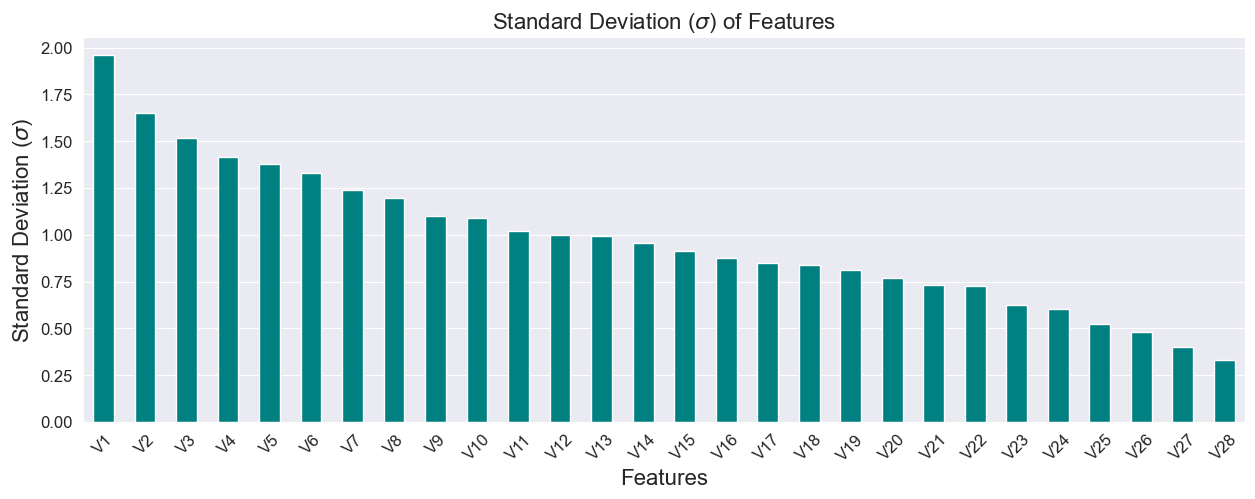

In [27]:
# Create Figure
# -------------------------
DF_desc.loc[['std']].T.plot(kind='bar', figsize=(15, 5), color='teal')

# Title and Labels
# -------------------------
plt.title(r'Standard Deviation ($\sigma$) of Features', fontsize=16)
plt.ylabel(r'Standard Deviation ($\sigma$)', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show Figure
# -------------------------
plt.grid(axis='x')
plt.legend().set_visible(False)
plt.show()

## Minimum and Maximum

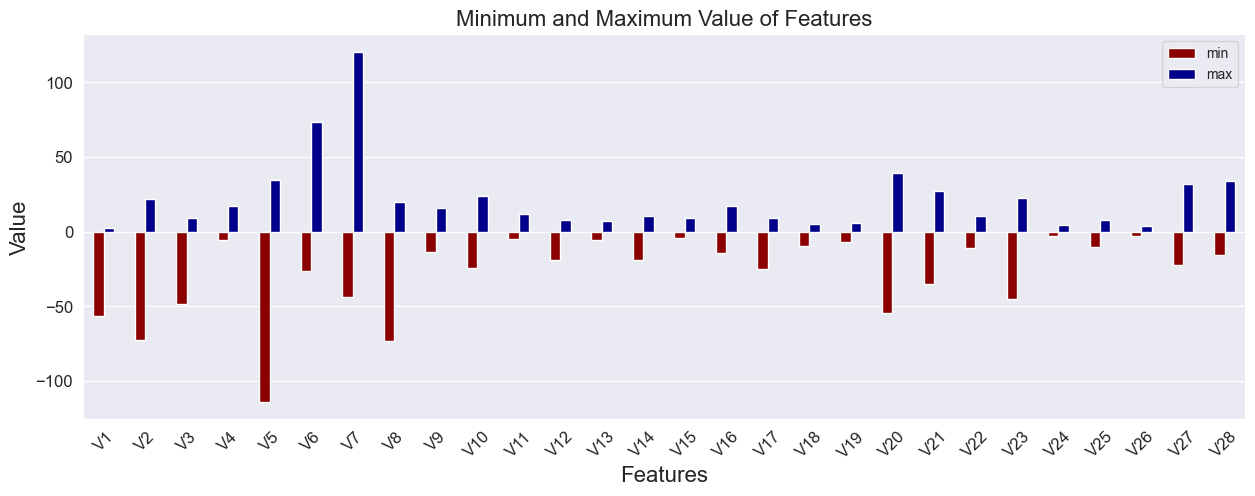

In [29]:
# Create Figure
# -------------------------
DF_desc.loc[['min', 'max']].T.plot(kind='bar', figsize=(15, 5), color=['darkred', 'darkblue'])

# Set Title and Labels
# -------------------------
plt.title(r'Minimum and Maximum Value of Features', fontsize=16)
plt.ylabel(r'Value', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show Figure
# -------------------------
plt.grid(axis='x')
plt.legend().set_visible(True)
plt.show()

## Quick Comments:

$$
\Huge \text{In this case: } \sigma >> \mu
$$

This may be a result of:
- The **<span style="color:red"> high-volume of transactions </span>** within the dataset.
- The **<span style="color:red"> existance of outliers skewing the dataset </span>**. (Some of these outliers may be fraudulent cases.

## Correlation Matrix

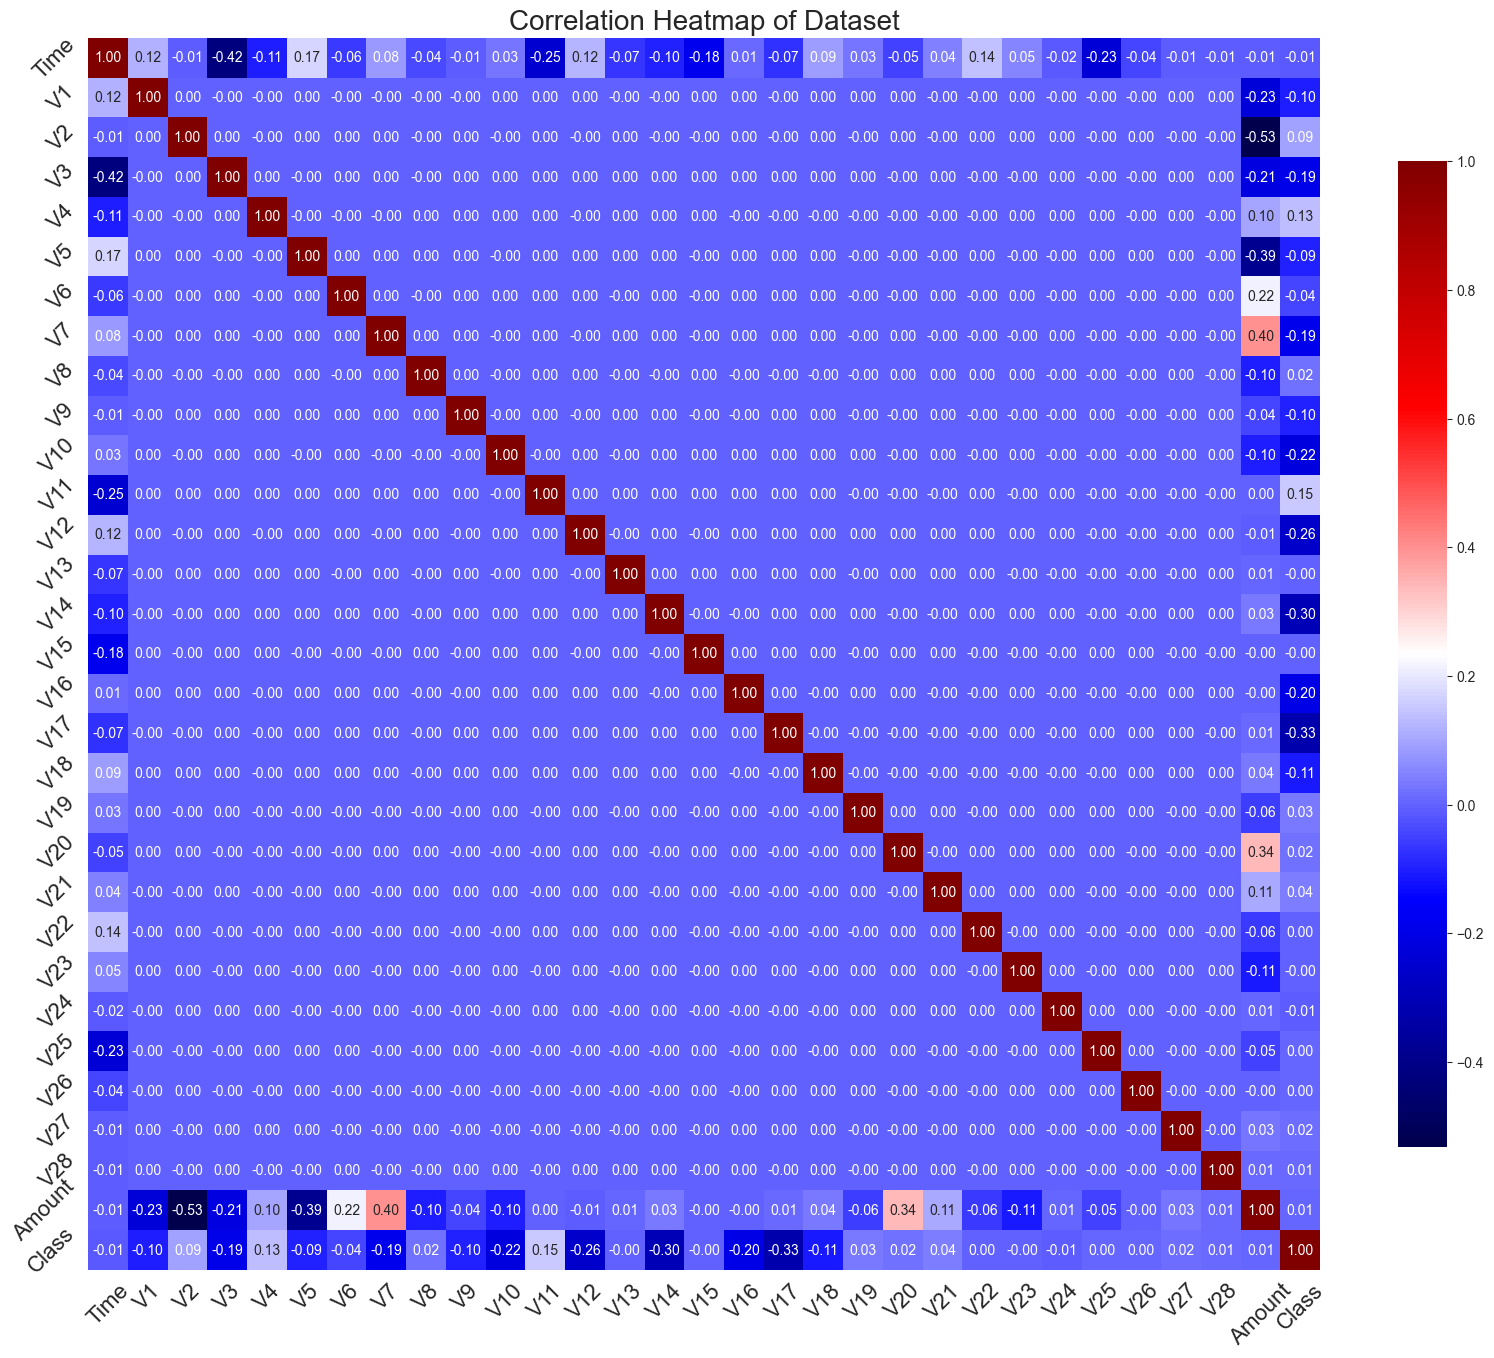

In [33]:
# Calculate the Correlation Matrix
# -------------------------
corr_matrix = DF.corr()

# Create Figure
# -------------------------
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='seismic', square=True, cbar_kws={"shrink": .8})

# Set Title
# -------------------------
plt.title('Correlation Heatmap of Dataset', fontsize = 20)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(rotation = 45, fontsize=16)

# Show Figure
# -------------------------
plt.show()

## Quick Comments:

$$
\Huge \text{In this case: }
$$

- There exists a **<span style="color:lime"> strong relationship </span>** between V2 and the transaction amount.
-  **<span style="color:orange"> Weaker relationships exist </span>** between V5, V7, and V20 with the transaction amount.

- No strong relationship between a single feature and fraud.
- **<span style="color:orange"> Fraud is linked to a combination of various features </span>** such as: V10, V12, V14, V16, and V17.

- **<span style="color:orange"> Due to data encoding (data privacy / protection), there isn't a straighforward (intuitive) answer. </span>**
 
- **<span style="color:red"> At first glance, no correlation between transaction amount and fraud. </span>**
(Credit card fraud can be any amount).

- **<span style="color:red"> At first glance, no correlation between transaction time and fraud. </span>**
(Credit card fraud can happen at any time).

$$ \Huge \text{Fraud can happen anytime, anywhere, and be any amount.} $$
$$ \Huge \text{Large amounts would be too obvious.} $$

## Principal Component Analysis (PCA) / Feature Distribution Analysis

<Figure size 1600x2400 with 0 Axes>

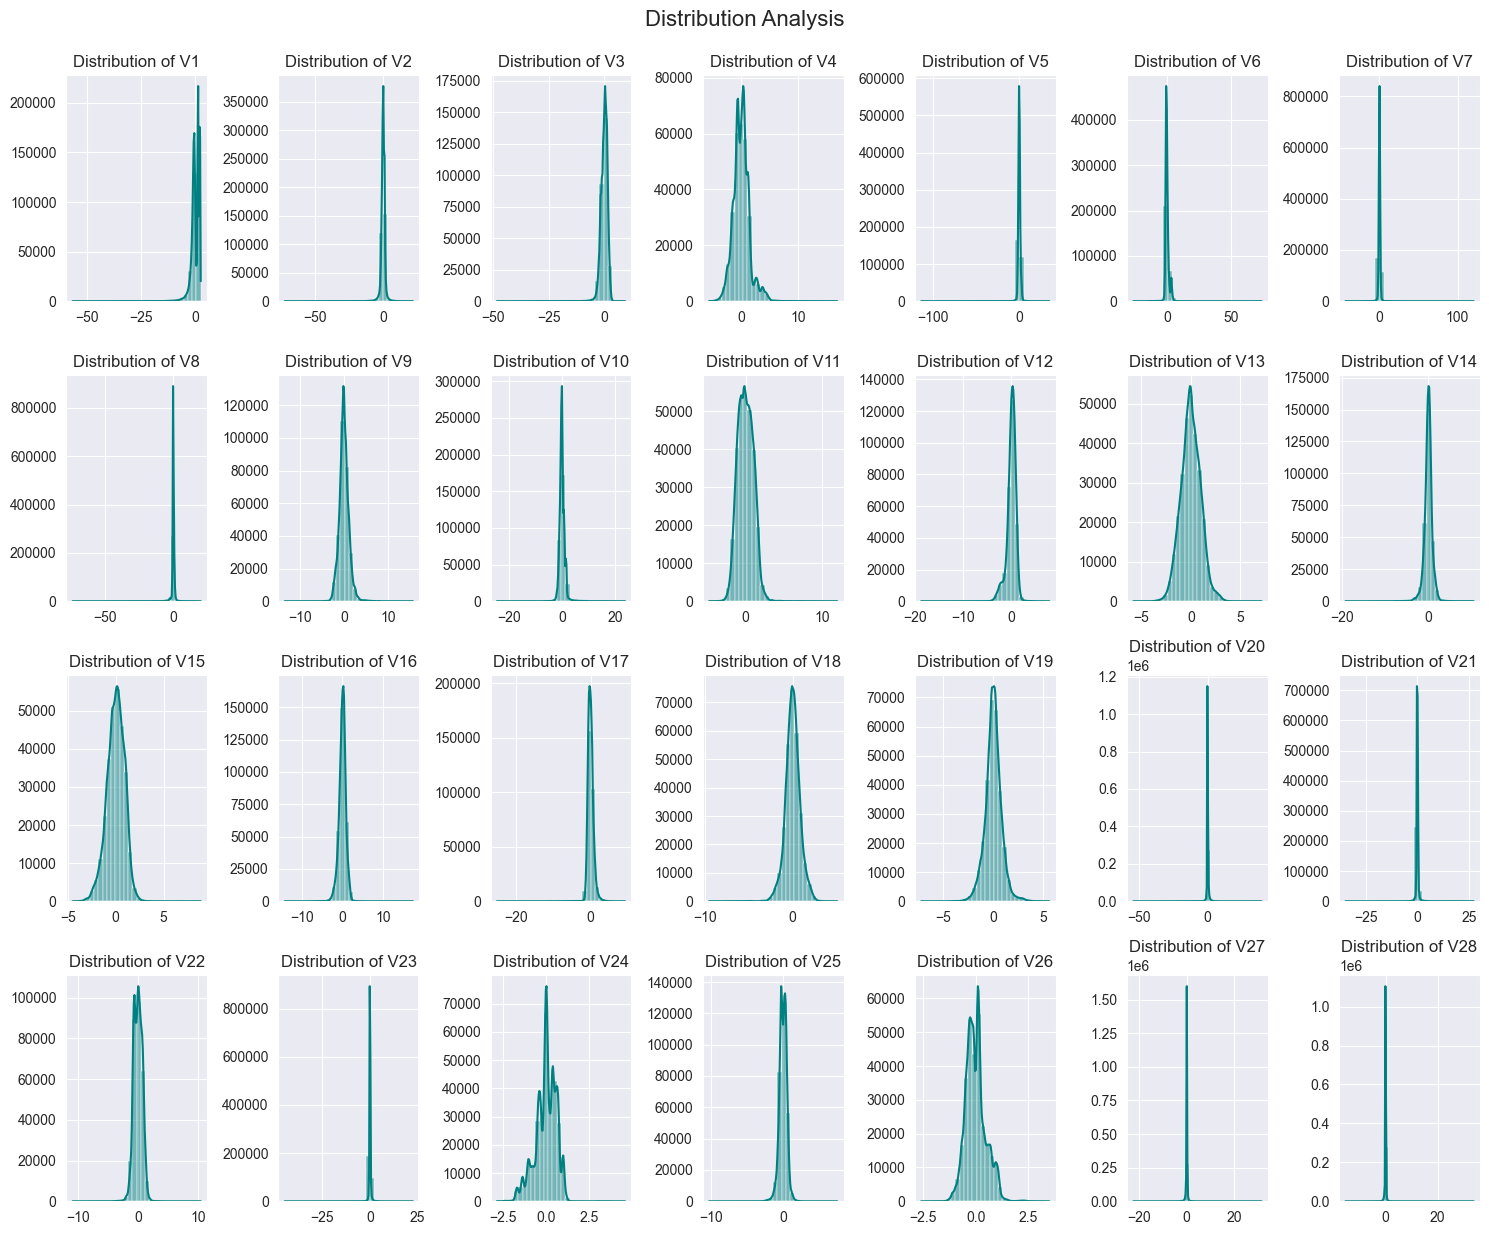

In [37]:
# Create Figure
# -------------------------
plt.figure(figsize=(16, 24))

# Create Components
# -------------------------
pca_components = [f'V{i}' for i in range(1, 29)]

# Plot Components
# -------------------------
plt.figure(figsize=(15, 12))
for i, component in enumerate(pca_components, 1):
    plt.subplot(4, 7, i)  # 4 rows and 7 columns for 28 PCA components
    sns.histplot(DF[component], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {component}')
    plt.xlabel('')
    plt.ylabel('')

# Show Figure
# -------------------------
plt.tight_layout()
plt.suptitle('Distribution Analysis', y = 1.025 , fontsize=16)
plt.show()

## Insights from Feature Distribution Analysis:

$$
\Huge \text{Left-skewed Features:}
$$

- V1
- V2
- V3
- V5
- V8
- V12
- V14
- V17

$$
\Huge \text{Right-skewed Features: }
$$

- V4
- V6
- V7
- V11

- **<span style="color:red"> Highly-skewed data may effect model-performance. </span>** (Certain models assume a certain distribution of feature values).

- Models that may be affected include: **<span style="color:orange">

- (1) Logistic/Linear Regression. >> Expect Normal / Gaussian distribution.

- (2) Decision Trees.  >> No strict distribution required. However, feature selection and outlier handling may be required.

- (3) Gradient Boosting. >> No strict distribution required. However, feature selection and outlier handling may be required. </span>**

$$ \Huge \text{Feature Engineering and Data Normalisation may be required.} $$
$$ \text{(At this stage we first evaluate model performance, before returning to this.)} $$

# Fraud Analysis / Target Variable Analysis

## Fraud Over Time

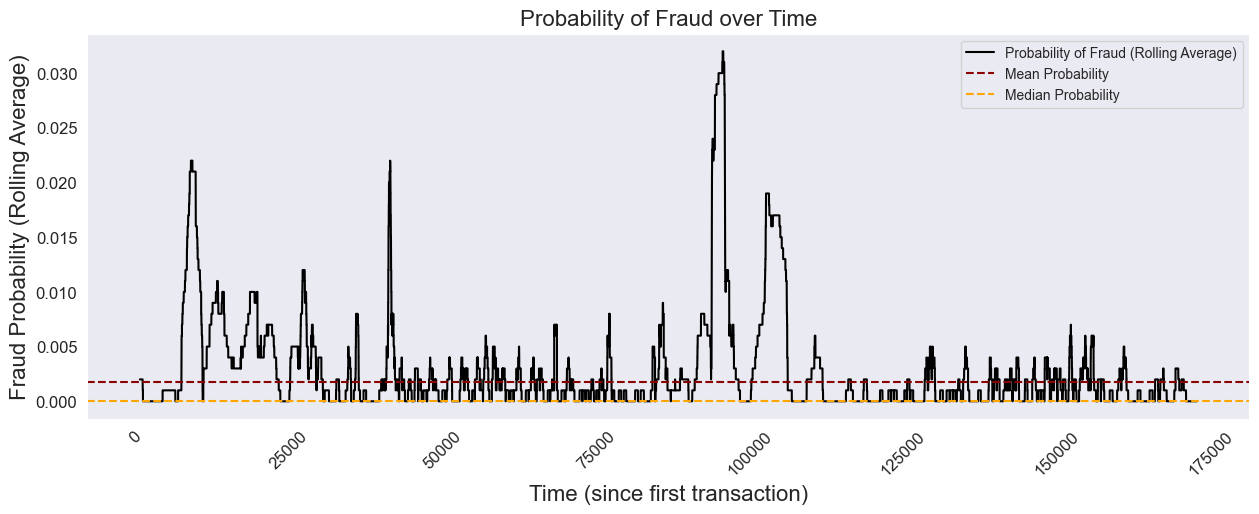

In [43]:
# Calculate Fraud Probability over Time
# -------------------------
DF['Fraud_Probability'] = DF['Class'].rolling(window=1000).mean()

# Create Figure
# -------------------------
plt.figure(figsize=(15, 5))


# Set Title and Labels
# -------------------------
plt.title(r'Probability of Fraud over Time', fontsize=16)
plt.xlabel('Time (since first transaction)', fontsize=16)
plt.ylabel('Fraud Probability (Rolling Average)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.plot(DF['Time'], DF['Fraud_Probability'], color='black', label='Probability of Fraud (Rolling Average)')
plt.axhline(y=DF['Class'].mean(), color='darkred', linestyle='--', label='Mean Probability')
plt.axhline(y=DF['Class'].median(), color='orange', linestyle='--', label='Median Probability')

# Show Figure
# -------------------------
plt.legend()
plt.grid()
plt.show()

## Quick Comments

- Probability of fraudulent transactions peaked at certain points in time.
- **<span style="color:red"> Not conclusive (percentages too low). </span>**

## Fraud by Amount

C:\Users\clint\AppData\Local\Temp\ipykernel_12488\4229948658.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = DF.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)


,Non-Fraud,Fraud
Amount Range,,
0-100,99.840825,0.159175
101-500,99.801641,0.198359
501-1000,99.595205,0.404795
1001-5000,99.701393,0.298607
5001-25000,100.000000,0.000000


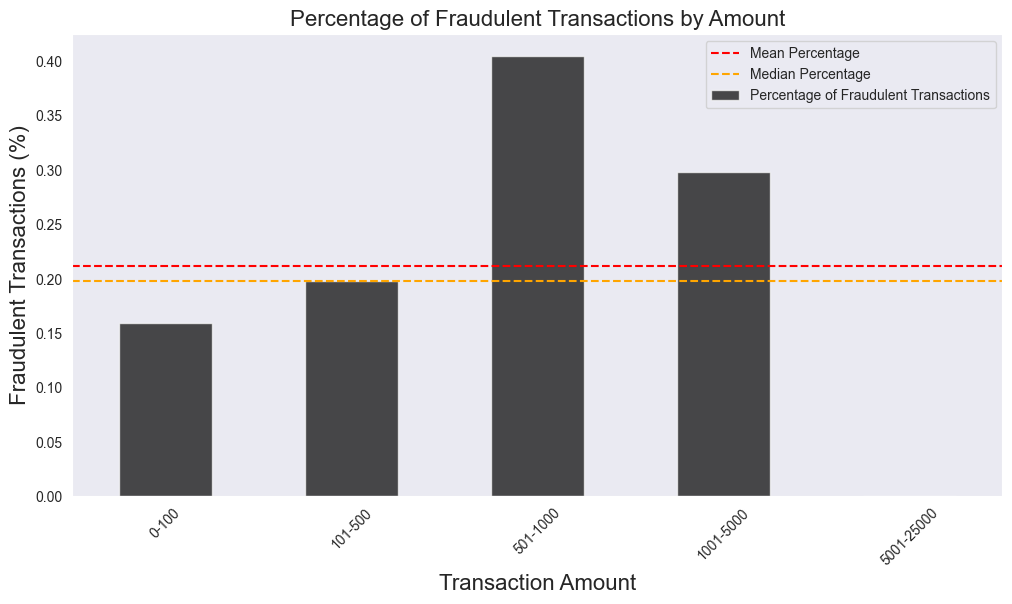

In [46]:
# Bin Data
# -------------------------
bins = [0, 100, 500, 1000, 5000, 25000] 
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-25000']
DF['Amount Range'] = pd.cut(DF['Amount'], bins=bins, labels=labels, right=False)
fraud_counts = DF.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts * 100

# Display Results
# -------------------------
display(fraud_counts)

# Create Figure
# -------------------------
plt.figure(figsize=(12, 6))
fraud_counts['Fraud'].plot(kind='bar', color='black', alpha=0.7, label='Percentage of Fraudulent Transactions')


# Set Title and Labels
# -------------------------
plt.title('Percentage of Fraudulent Transactions by Amount', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=16)
plt.ylabel('Fraudulent Transactions (%)', fontsize=16)
plt.xticks(rotation=45)

# Show Figure
# -------------------------
plt.grid()
plt.axhline(y=fraud_counts['Fraud'].mean(), color='red', linestyle='--', label='Mean Percentage')
plt.axhline(y=fraud_counts['Fraud'].median(), color='orange', linestyle='--', label='Median Percentage')
plt.legend()
plt.show()

## Quick Comments

- Instances of Fraud are less than 1% across the board. (Heavily imbalanced dataset).
- Out of all fraudulent transactions, most of these had a value between 500 and 1000.

# Fraud Classification with Machine Learning

In [49]:
# Freshly read in the Data
# -------------------------
DF = pd.read_csv('creditcard.csv', index_col=False)

In [50]:
def Report(X_test, y_test, model, predictions):
    
    '''
    Print out the metrics of the model, given its test set and predictions.

    Input Params:
    X_test [pandas.core.frame.DataFrame]: X Test set.
    y_test pandas.core.series.Series]: y Test set.
    model [sklearn.linear_model]: Machine Learning model.
    predictions [numpy.ndarray]: Model predictions.
    
    '''
    print("")
    print("------------------------------")
    print("Classification Report:")
    print("------------------------------")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("")

    return None

$$
\Huge \text{Precision} = \frac{TP}{TP + FP}
$$

$$
\Huge \text{Recall} = \frac{TP}{TP + FN}
$$

$$
\Huge \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

## Standard Logistic Regression Model

$$
\Huge \text{Strengths:}
$$

- **<span style="color:lime"> Easy to interpret. </span>**.
- **<span style="color:lime"> Computationally efficient. </span>**.

$$
\Huge \text{Weaknesses:}
$$

- Limited to linear relationships, **<span style="color:red"> may not capture the complex multi-faceted nature of fraud. </span>**.
- **<span style="color:red"> Sensitive to imbalanced / skewed data </span>**.
- Heavily **<span style="color:red"> depends on Feature Engineering </span>**.

Logistic regression minimises the log-loss cost function, known as:

$$
\Huge \text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right)
$$

Where:
- $N$ = Total number of samples
- $y_i$ = Label of $i$-th sample (0 or 1)
- $p_i$ = Predicted probability for the $i$-th sample

In [55]:
%%time 
# Time this cell

# Set Features and Target
# -------------------------
X = DF.drop('Class', axis=1) # Features
y = DF['Class'] # Target

# Train-Test split
# -------------------------
# Based on the large size of the dataset, we use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create Logistic Regression Model
# -------------------------
log_reg_mdl = LogisticRegression(
    max_iter=1000,    # Default maximum iterations
    class_weight='balanced',    # For handling the large unbalanced dataset
    solver='lbfgs',     # Default solver
    n_jobs=-1, # Use all CPU Cores
    random_state=42 # Reproducibility
)

# Fit Model to Training Set
# -------------------------
log_reg_mdl.fit(X_train, y_train)

# Make Predictions on Test Set
# -------------------------
log_reg_pred = log_reg_mdl.predict(X_test)

# Evaluate Model Performance
# -------------------------
Report(X_test, y_test, log_reg_mdl, log_reg_pred)


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55448  1416]
 [    8    90]]
ROC AUC Score: 0.9711992738851307

CPU times: total: 438 ms
Wall time: 26.3 s


## Standard Random Forest Model

$$
\Huge \text{Strengths:}
$$

- **<span style="color:lime"> Large/Deep decision trees may achieve high accuracy </span>**.
- **<span style="color:lime"> Resillient to overfitting </span>**.

$$
\Huge \text{Weaknesses:}
$$

- **<span style="color:red"> Less interpretable </span>**.
- **<span style="color:red"> Memory-intensive / Computationally expensive </span>**.

Random Forest Algorithms work on the basis of minimising the Gini Impurity or Entropy.

### Gini Impurity

The Gini impurity measures the probability of a randomly chosen element to be misclassified.

$$
\Huge G = 1 - \sum_{k=1}^{K} p_k^2
$$

- $G$: Gini impurity of the node.
- $K$: Total classes.
- $p_k$: Proportion of samples belonging to class $k$.

### Entropy

Entropy in this case refers to the "information entropy", or disorder/impurity of the dataset.

$$
\Huge H = - \sum_{k=1}^{K} p_k \log(p_k)
$$

- $H$: Entropy of a given node.
- $K$: Total number of classes.
- $p_k$: Probability of a sample belonging to class $k$ in the node.

In [59]:
%%time 
# Time this cell

# Set Features and Target
# -------------------------
X = DF.drop('Class', axis=1) # Features
y = DF['Class'] # Target

# Train-Test split
# -------------------------
# Based on the large size of the dataset, we use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create Random Forest Model
# -------------------------
rf_mdl = RandomForestClassifier(
    n_estimators=200,    # Default number of trees
    max_depth=None, # No limit by default
    min_samples_split=2,   # Minimum number of samples to split each node
    min_samples_leaf=1, # Minimum number of samples required to be a leaf
    class_weight='balanced',    # For handling the large unbalanced dataset
    n_jobs=-1,    # Use all CPU nodes
    random_state=42    # Reproducibility
)

# Fit Model to Training Set
# -------------------------
rf_mdl.fit(X_train, y_train)

# Make Predictions on Test Set
# -------------------------
rf_pred = rf_mdl.predict(X_test)

# Evaluate Model Performance
# -------------------------
Report(X_test, y_test, rf_mdl, rf_pred)


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   24    74]]
ROC AUC Score: 0.9571890288895525

CPU times: total: 7min 6s
Wall time: 58.5 s


## Standard XGBoost Model

$$
\Huge \text{Strengths:}
$$

- **<span style="color:lime"> Known for its very high performance </span>**.
- **<span style="color:lime"> Includes in-built regularisation techniques to withstand imbalanced datasets </span>**.

$$
\Huge \text{Weaknesses:}
$$

- **<span style="color:red"> Less interpretable (similar to Random Forests) </span>**.
- **<span style="color:red"> Sensitive to overfitting/underfitting. Sensitive to changes in hyperparameters </span>**.

$$
\Huge \text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right)
$$

Where:
- $N$ = Total number of samples
- $y_i$ = Label of $i$-th sample (0 or 1)
- $p_i$ = Predicted probability for the $i$-th sample

In [63]:
%%time 
# Time this cell

# Set Features and Target
# -------------------------
X = DF.drop('Class', axis=1) # Features
y = DF['Class'] # Target

# Train-Test split
# -------------------------
# Based on the large size of the dataset, we use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create XGBoost Model
# -------------------------
XGB_mdl1 = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.1, # Default Learning Rate
    max_depth=6, # Default Max-Depth
    n_estimators=200, # Default Number of Estimators
    n_jobs=-1,    # Use all CPU nodes
    random_state=42    # Reproducibility
)

# Fit Model to Training Set
# -------------------------
XGB_mdl1.fit(X_train, y_train)

# Make Predictions on Test Set
# -------------------------
XGB_pred1 = XGB_mdl1.predict(X_test)

# Evaluate Model Performance
# -------------------------
Report(X_test, y_test, XGB_mdl1, XGB_pred1)


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56856     8]
 [   18    80]]
ROC AUC Score: 0.9768915163138975

CPU times: total: 20.2 s
Wall time: 3.16 s


# Compare all 3 ML Models Side-by-Side

In [65]:
Report(X_test, y_test, log_reg_mdl, log_reg_pred)
Report(X_test, y_test, rf_mdl, rf_pred)
Report(X_test, y_test, XGB_mdl1, XGB_pred1)


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55448  1416]
 [    8    90]]
ROC AUC Score: 0.9711992738851307


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   24    74]]
ROC AUC Score: 0.9571890288895525


---

$$
\Huge \text{In Order of Speed:}
$$

- 1st: XGBoost (<10s Runtime)
- 2nd: Logistic Regression (<30s Runtim)
- 3rd: Random Forest (~1m Runtime)

$$
\Huge \text{In Order of Accuracy:}
$$

- 1st: XGBoost (Good ROC AUC, Good Precision and Recall, Good F1).
- 2nd: Random Forest (Good ROC AUC, Good Precision and Recall, Good F1).
- 3rd: Logistic Regression (Good ROC AUC, Bad Precision, Bad F1).

## XGBoost with SMOTE, and Class-Scaling

In [68]:
%%time 
# Time this cell

# Set Features and Target
# -------------------------
X = DF.drop('Class', axis=1) # Features
y = DF['Class'] # Target

# Train-Test split
# -------------------------
# Based on the large size of the dataset, we use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
# -------------------------
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Calculate scale weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create XGBoost Model
# -------------------------
XGB_mdl2 = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight = scale_pos_weight,
    learning_rate=0.1, # Default Learning Rate
    max_depth=6, # Default Max-Depth
    n_estimators=200, # Default Number of Estimators
    n_jobs=-1,    # Use all CPU nodes
    random_state=42    # Reproducibility
)

# Fit Model to Training Set
# -------------------------
XGB_mdl2.fit(X_train, y_train)

# Make Predictions on Test Set
# -------------------------
XGB_pred2 = XGB_mdl2.predict(X_test)

# Evaluate Model Performance
# -------------------------
Report(X_test, y_test, XGB_mdl2, XGB_pred2)


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.87      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56835    29]
 [   13    85]]
ROC AUC Score: 0.9819526431844545

CPU times: total: 41.7 s
Wall time: 7.16 s


## XGBoost with SMOTE, Class-Scaling, and Hyperparameter-Tuning

In [70]:
%%time 
# Time this cell

# Set Features and Target
# -------------------------
X = DF.drop('Class', axis=1) # Features
y = DF['Class'] # Target

# Train-Test split
# -------------------------
# Based on the large size of the dataset, we use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
# -------------------------
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Calculate scale weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create XGBoost Model
# -------------------------
XGB_base = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.1, # Default Learning Rate
    max_depth=6, # Default Max-Depth
    n_estimators=200, # Default Number of Estimators
    n_jobs=-1,    # Use all CPU nodes
    random_state=42    # Reproducibility
)

# -------------------------
# Apply Hyperparameter Tuning
# -------------------------

# Create parameter space
# -------------------------

# In this case only consider learning_rate, n_estimators, and max_depth

param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
}

# Set up cross-validation strategy
# -------------------------
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply randomised search to explore the parameter space
# -------------------------

rdm_mdl = RandomizedSearchCV(
    estimator=XGB_base,
    param_distributions=param_dist,
    n_iter=10, # Number of iterations
    scoring='roc_auc',  # Use ROC AUC scoring for better performance
    cv=cv_strat,  # Use stratified K-fold cross-validation for better performance
    verbose=1,
    n_jobs=-1    # Use all CPU nodes
)

# Fit model
# -------------------------
rdm_mdl.fit(X_train, y_train)

# Get best parameters
# -------------------------
best_params = rdm_mdl.best_params_
best_score = rdm_mdl.best_score_
print("Best parameters: ", best_params)
print("Best ROC AUC score from RandomizedSearchCV: ", best_score)

# Train new model based on best parameters
# -------------------------
XGB_mdl3 = XGBClassifier(
    **best_params,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='logloss',
    n_jobs=-1,    # Use all CPU nodes
    random_state=42    # Reproducibility
)

# Fit new model
# -------------------------
XGB_mdl3.fit(X_train, y_train)

# Make predictions
# -------------------------
XGB_pred3 = XGB_mdl3.predict(X_test)

# Evaluate Model Performance
# -------------------------
Report(X_test, y_test, XGB_mdl3, XGB_pred3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'learning_rate': 0.17328358659902748, 'max_depth': 6, 'n_estimators': 300}
Best ROC AUC score from RandomizedSearchCV:  0.9999948228925195

------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.86      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56845    19]
 [   14    84]]
ROC AUC Score: 0.980580949318388

CPU times: total: 1min 50s
Wall time: 4min 7s


# Compare XGBoost Models Side-by-Side

In [72]:
Report(X_test, y_test, XGB_mdl1, XGB_pred1) # Default
Report(X_test, y_test, XGB_mdl2, XGB_pred2) # With SMOTE and added Class-balancing
Report(X_test, y_test, XGB_mdl3, XGB_pred3) # Tuned


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56856     8]
 [   18    80]]
ROC AUC Score: 0.9768915163138975


------------------------------
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.87      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56835    29]
 [   13    85]]
ROC AUC Score: 0.9819526431844545


---

$$
\Huge \text{Results:}
$$

- Default XGBoost model yields good precision, recall and F1-score.
- XGBoost with SMOTE and added class-balancing balances out the precision and recall scores.
- XGBoost with Hyperparameter tuning gives similar scores. Scores converge.

$$
\Huge \text{Feature Engineering might be required to further improve model performance.}
$$

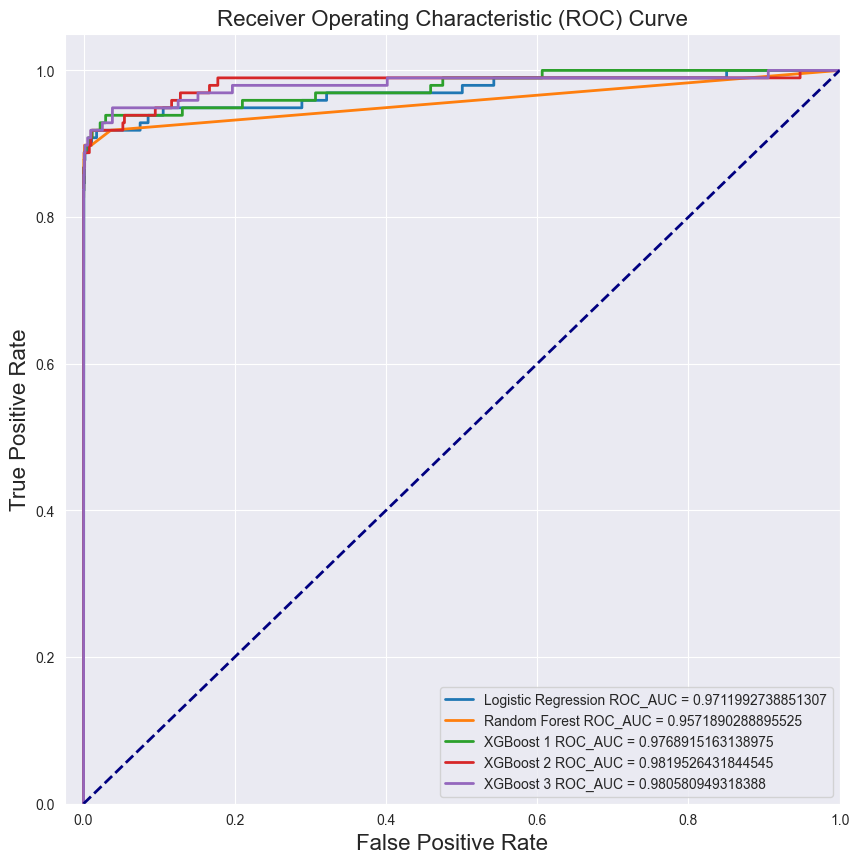

In [74]:
# Get predicted probabilities for the positive class (class 1)
y_probs_log_reg = log_reg_mdl.predict_proba(X_test)[:, 1]
y_probs_rf = rf_mdl.predict_proba(X_test)[:, 1]

y_probs_XGB1 = XGB_mdl1.predict_proba(X_test)[:, 1]
y_probs_XGB2 = XGB_mdl2.predict_proba(X_test)[:, 1]
y_probs_XGB3 = XGB_mdl3.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds


# Create Figure
# -------------------------
plt.figure(figsize=(10, 10))

# Log Reg
fpr, tpr, thresholds = roc_curve(y_test, y_probs_log_reg)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label = 'Logistic Regression ROC_AUC = {}'.format(roc_auc))

# RF
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label = 'Random Forest ROC_AUC = {}'.format(roc_auc))

# XGB1
fpr, tpr, thresholds = roc_curve(y_test, y_probs_XGB1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label = 'XGBoost 1 ROC_AUC = {}'.format(roc_auc))

# XGB2
fpr, tpr, thresholds = roc_curve(y_test, y_probs_XGB2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label = 'XGBoost 2 ROC_AUC = {}'.format(roc_auc))

# XGB3
fpr, tpr, thresholds = roc_curve(y_test, y_probs_XGB3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label = 'XGBoost 3 ROC_AUC = {}'.format(roc_auc))



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

# Plot
# -------------------------
plt.xlim([-0.025, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)

# Show Figure
# -------------------------

plt.legend(loc='lower right')
plt.show()

# Model Deployment

In [76]:
path = r'C:\Users\clint\Desktop\FinRiskAi'

In [77]:
cd $path

C:\Users\clint\Desktop\FinRiskAi


C:\Users\clint\anaconda3\envs\py312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [78]:
# Save ML Models
# -------------------------
joblib.dump(log_reg_mdl, 'log_reg_mdl.pkl')
joblib.dump(rf_mdl, 'rf_mdl.pkl')

joblib.dump(XGB_mdl1, 'XGB_mdl1.pkl')
joblib.dump(XGB_mdl2, 'XGB_mdl2.pkl')
joblib.dump(XGB_mdl3, 'XGB_mdl3.pkl')

['XGB_mdl3.pkl']

In [79]:
ls

 Volume in drive C is OS
 Volume Serial Number is C88A-CBDB

 Directory of C:\Users\clint\Desktop\FinRiskAi

2024/11/07  15:26    <DIR>          .
2024/11/07  14:44    <DIR>          ..
2024/11/05  17:25    <DIR>          .gradio
2024/11/05  15:22    <DIR>          .ipynb_checkpoints
2024/11/05  15:29       150 828 752 creditcard.csv
2024/11/07  11:02            51 530 Fraud.csv
2024/11/07  15:26         1 128 428 Fraud_Detection.ipynb
2024/11/07  15:30             1 711 log_reg_mdl.pkl
2024/11/07  14:51            51 113 None
2024/11/07  15:21            51 113 predictions.csv
2024/11/07  15:30         7 070 185 rf_mdl.pkl
2024/11/05  17:42        30 596 521 testset.csv
2024/11/05  17:27            52 543 transactions.csv.txt
2024/11/07  15:30           434 761 XGB_mdl1.pkl
2024/11/07  15:30           693 539 XGB_mdl2.pkl
2024/11/07  15:30           749 274 XGB_mdl3.pkl
              12 File(s)    191 709 470 bytes
               4 Dir(s)  336 625 524 736 bytes free


In [80]:
# Load Machine Learning Model
# -------------------------
model = joblib.load('XGB_mdl3.pkl')

# Model Prediction Function
# -------------------------
def predict(csv_file):
    try:
        # Read CSV
        DF = pd.read_csv(csv_file.name)
        DF = DF[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 
                 'V6', 'V7', 'V8', 'V9', 'V10', 
                 'V11', 'V12', 'V13', 'V14', 'V15', 
                 'V16', 'V17', 'V18', 'V19', 'V20', 
                 'V21', 'V22', 'V23', 'V24', 'V25', 
                 'V26', 'V27', 'V28', 'Amount', 'Class']]

        # Print available columns for debugging
        print("DataFrame columns:\n", DF.columns.tolist())  # Print available columns

        # Specify the target column
        target_column = 'Class'  # Update with your actual target variable name

        # Check if the target column exists in the DataFrame
        if target_column not in DF.columns:
            return f"Error: '{target_column}' not found in the CSV file. Available columns: {DF.columns.tolist()}"

        # Use all columns except the target variable as input features
        input_columns = DF.columns[DF.columns != target_column].tolist()  # Exclude the target column
        print("Input columns for prediction:\n", input_columns)  # Print the input columns for verification

        # Make predictions
        predictions = model.predict(DF[input_columns])  # Use all features for prediction

        # Create a DataFrame to hold the results
        DF_results = DF.copy()
        DF_results['predictions'] = predictions  # Add predictions to the DataFrame

        # Save Output
        output_file_path = 'predictions.csv'  # Specify output file
        DF_results.to_csv(output_file_path, index=False)  # Save DataFrame to CSV

        return f"Predictions saved to {output_file_path}"

    # Error Handling
    # -------------------------
    except FileNotFoundError:
        return "Error: File not found."
    except pd.errors.EmptyDataError:
        return "Error: File is empty."
    except pd.errors.ParserError:
        return "Error: File is the incorrect format."
    except Exception as e:
        return f"An unexpected error occurred: {str(e)}"  # Return the error message

# Create Gradio Interface
# -------------------------
iface = gr.Interface(
    fn=predict,
    inputs=gr.File(label="Upload CSV"), 
    outputs=gr.Textbox(label="Predictions")
)

# Launch Gradio Interface
# -------------------------
iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [129]:
DF_pred = pd.read_csv('predictions.csv')

In [131]:
DF_confirmed = DF_pred[np.array(DF_pred['Class']) == np.array(DF_pred['predictions'])]

In [133]:
DF_confirmed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,predictions
0,57007.0,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,...,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01,1,1
1,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1,1
2,75581.0,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,124.53,1,1
3,43494.0,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90,1,1
4,41313.0,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,...,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,9.99,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102671.0,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,-3.875643,...,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886,0.00,1,1
91,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91,1,1
92,11629.0,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,...,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.00,1,1
93,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1,1


# Citations:

Dataset obtained from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Acknowledgements:

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project.

- Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

- Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

- Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

- Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

- Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

- Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

- Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

- Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

- Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

- Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics